# Derivadas direccionales, gradiente y matriz jacobiana

## Derivadas direccionales

En la sección anterior hemos aprendido cómo, dado el gráfico de una función de dos variables,  calcular la inclinación haciendo cortes por planos paralelos a los ejes $X$ e $Y$. 
Ahora vamos a ampliar esta idea y veremos cómo calcular la inclinación en cualquier dirección. 

Es decir, veremos la inclinación que tenemos que afrontar si queremos bajar (o subir) por la ladera de una montaña, en cualquier dirección...

<img src="../../images/3.2.Montaña.png" width="300"/>

````{prf:definition} Derivada direccional
:label: def_DerivDirec
:nonumber: 

Sea $f:\mathbb{R}^{2} \to \mathbb{R}$ y $\left(x_{0}, y_{0}\right)$ un punto en el dominio de $f$. 
Sea $\mathbf{u}=\left(u_{1},u_{2}\right)$, un vector unitario ($\|\mathbf{u}\|=1$). 
Definimos la **derivada direccional de $f$ en $\left(x_{0}, y_{0}\right)$ en la dirección de $\mathbf{u}$**, 
$D_{\mathbf{u}}f\left(x_{0}, y_{0}\right)$, como el límite, si existe,

\begin{eqnarray*}
 D_{\mathbf{u}}f\left(x_{0}, y_{0}\right) &:=& 
    \lim_{h\to 0}\frac{f\left( (x_{0}, y_{0}) + h(v_{1},v_{2}) \right)-f\left(x_{0}, y_{0}\right)}{h} \\
    &=& \lim_{h\to 0}\frac{f\left(x_{0}+hv_{1}, y_{0}+hv_{2} \right)-f\left(x_{0}, y_{0}\right)}{h}.
\end{eqnarray*}
    
<img src="../../images/3.2.Derivada_direccional.jpg" width="500"/>
    
````

La imagen anterior la hemos obtenido de la aplicación de Geogebra, creada por Laura del Río, https://www.geogebra.org/m/ZTttemYc.

**Nota:** Si $f$ es una función de tres variables, podemos definir de forma análoga la derivada direccional de $f$ en un punto de su dominio según la dirección marcada por cualquier vector unitario en $\mathbb{R}^3$.

Veamos cómo calcular una derivada direccional aplicando directamente la definición con `Python`.
En concreto, calcularemos la derivada de $f(x,y) = \frac{x}{(x+y)y}$ en el punto $P=(1,2)$ según la dirección de 
$\mathbf{u} = (\cos(\theta),\sin(\theta))$ para cualquier $\theta\in[0,2\pi)$. Hacia el final de esta sección, calcularemos esta misma derivada direccional utilizando el vector gradiente. 

In [1]:
import sympy as sp
x, y = sp.symbols('x y', real=True) # define las variables simbólicas x, y
h = sp.Symbol('h', real=True) # define la variable simbólica h
theta = sp.Symbol('theta', real=True) # define la variable simbólica h

f=sp.Lambda((x,y), x/((x+y)*y))

P = [1, 2]
u = [sp.cos(theta), sp.sin(theta)]

df_u = sp.limit( ( f(P[0]+h*u[0],P[1]+h*u[1]) - f(P[0],P[1]) ) / h , h, 0 )

display('Derivada en la dirección de u: ',df_u)  

'Derivada en la dirección de u: '

-5*sin(theta)/36 + cos(theta)/9

## Vector gradiente

````{prf:definition} Vector gradiente
:label: def_gradiente
:nonumber: 

Sea $f:\mathbb{R}^{2} \to \mathbb{R}$ y $\left(x_{0}, y_{0}\right)$ un punto en el dominio de $f$. 
 Definimos el **vector gradiente de $f$ en $\left(x_{0}, y_{0}\right)$** como el vector, si existe,

$$
 \mathbf{\nabla}f \left(x_{0}, y_{0}\right) = 
 \left( \frac{\partial f}{\partial x} \left(x_{0}, y_{0}\right), \frac{\partial f}{\partial y} \left(x_{0}, y_{0}\right) \right)^{\mathrm{t}}.
$$
        
````

**NOTA 1:** Nosotros usaremos la notación $\mathbf{\nabla}$ ("nabla") para el gradiente, aunque en ocasiones lo podréis ver escrito como "$\mathbf{grad}$":

$$
\mathbf{grad} f \left(x_{0}, y_{0}\right) = \mathbf{\nabla}f \left(x_{0}, y_{0}\right).
$$

Fíjate que el gradiente para una función de dos variables es un vector bidimensional. Suele representarse en el plano $XY$, sobre el dominio de la función, como se muestra en la siguiente figura (extraída de la aplicación de Geogebra de Rafael Robles que podéis encontrar en https://www.geogebra.org/m/rfgggtps):

<img src="../../images/3.2.Gradiente.png" width="600"/>


**NOTA 2:** Si $f$ es una función de tres variables, podemos definir su gradiente como

$$
\mathbf{\nabla}f \left(x_{0}, y_{0}, z_{0}\right) = \left( \frac{\partial f}{\partial x} \left(x_{0}, y_{0}, z_{0}\right), \frac{\partial f}{\partial y} \left(x_{0}, y_{0}, z_{0}\right), 
\frac{\partial f}{\partial z} \left(x_{0}, y_{0}, z_{0}\right) \right)^{\mathrm{t}}.
$$

## Aplicaciones del gradiente

````{prf:property} Cálculo de la derivada direccional con el gradiente
:label: prop_CalculoDerDirecc
:nonumber: 

Sea $f:\mathbb{R}^{2} \to \mathbb{R}$ y $\left(x_{0}, y_{0}\right)$ un punto en el dominio de $f$ para
el que existe $\mathbf{\nabla} f\left(x_{0}, y_{0}\right)$.

Entonces, para cualquier vector $\mathbf{u}\in\mathbb{R}^{2}$, con $\|\mathbf{u}\|=1$, se cumple

$$
D_{\mathbf{u}}f\left(x_{0}, y_{0}\right)  = \mathbf{u}^{\mathrm{t}} \cdot \mathbf{\nabla} f \left(x_{0}, y_{0}\right)
= u_{1}\frac{\partial f}{\partial x} \left(x_{0}, y_{0}\right) + u_{2}\frac{\partial f}{\partial y} \left(x_{0}, y_{0}\right).
$$
        
````

**NOTA:** Para funciones de tres variables:

$$
D_{\mathbf{u}}f\left(x_{0}, y_{0}, z_{0}\right)  = \mathbf{u}^{\mathrm{t}} \cdot \mathbf{\nabla} f \left(x_{0}, y_{0}, z_{0}\right)
= u_{1}\frac{\partial f}{\partial x} \left(x_{0}, y_{0}, z_{0}\right) + 
  u_{2}\frac{\partial f}{\partial y} \left(x_{0}, y_{0}, z_{0} \right) +
  u_{3}\frac{\partial f}{\partial z} \left(x_{0}, y_{0}, z_{0} \right).
$$

````{prf:remark} 
:label: rem_CalculoDerDirecc
:nonumber: 

1. Si la dirección respecto a la cual queremos calcular la derivada direccional viniera definida respecto a un vector, $\mathbf{v}$, no unitario, basta normalizarlo: $\displaystyle\mathbf{u}=\frac{\mathbf{v}}{\|\mathbf{v}\|}$.
2. Cuando elegimos un vector unitario, $\mathbf{u}$, podemos pensar que es un punto en la circunferencia de radio unidad y, por tanto, podemos reescribir sus coordenadas en función de un ángulo $\theta$ como sigue: 

    $$
    \mathbf{u}=\left(u_{1},u_{2}\right)^{\mathrm{t}} = \left(\cos(\theta),\sin(\theta)\right)^{\mathrm{t}},
    $$ 
    para algún $\theta\in [0,2\pi)$. Por lo tanto, la fórmula de la derivada direccional podría escribirse como 

    $$
    D_{\mathbf{u}}f\left(x_{0}, y_{0}\right)  = \mathbf{u}^{\mathrm{t}} \cdot \mathbf{\nabla} f \left(x_{0}, y_{0}\right) 
    = \cos(\theta)\frac{\partial f}{\partial x} \left(x_{0}, y_{0}\right) + 
    \sin(\theta)\frac{\partial f}{\partial y} \left(x_{0}, y_{0}\right).
    $$
    
    <img src="../../images/3.2.Vectores_unitarios.png" width="400"/>
        
````

````{prf:property} 
:label: prop_PropGradiente
:nonumber: 

Sea $f:\mathbb{R}^{2} \to \mathbb{R}$ y $\left(x_{0}, y_{0}\right)$ un punto en el dominio de $f$ para
el que existe $\mathbf{\nabla} f\left(x_{0}, y_{0}\right)$.

1. $\left( +\mathbf{\nabla} f\left(x_{0}, y_{0}\right) \right)$ indica la dirección de máximo crecimiento de $f$ en $\left(x_{0}, y_{0}\right)$.
   El valor máximo de $D_{\mathbf{u}}f\left(x_{0}, y_{0}\right)$ es $\left\|\mathbf{\nabla} f\left(x_{0}, y_{0}\right)\right\|$.
2. $\left( -\mathbf{\nabla} f\left(x_{0}, y_{0}\right) \right)$ indica la dirección de máximo decrecimiento de $f$ en 
   $\left(x_{0}, y_{0}\right)$. El valor mínimo de $D_{\mathbf{u}}f\left(x_{0}, y_{0}\right)$ es 
   $-\left\|\mathbf{\nabla} f\left(x_{0}, y_{0}\right)\right\|$.
3. Si $\mathbf{\nabla} f\left(x_{0}, y_{0}\right)\neq \mathbf{0}$, entonces $\mathbf{\nabla} f\left(x_{0}, y_{0}\right)$ es 
   ortogonal a la curva de nivel que pasa por $\left(x_{0}, y_{0}\right)$, como se muestra en la siguiente figura 
   (extraída de la aplicación en Geogebra de Analucía Fantín, https://www.geogebra.org/m/zqzweqcq):
   
   <img src="../../images/3.2.Gradiente_y_curvas_nivel.png" width="600"/>
   
````    

## Links para ampliar información

Si os quedáis con ganas de más, os recomendamos que echéis un vistazo a: 

* [Capítulo sobre derivadas direccionales y propiedades del gradiente del libro de Cálculo Multivariable de la ETS de Ingeniería de la Universidad de Sevilla.](https://espanol.libretexts.org/Matematicas/Calculo/Calculo_en_Varias_Variables_(ETS_Ingenieria_de_la_Universidad_de_Sevilla)/1._DERIVADAS_PARCIALES/1.6._Las_derivadas_direccionales_y_las_propiedades_del_gradiente)
* [Capítulo correspondiente del (magnífico) libro en abierto de G. Strang y E.J. Herman.](https://openstax.org/books/c%C3%A1lculo-volumen-3/pages/4-6-derivadas-direccionales-y-el-gradiente)


## Matriz jacobiana

Por su interés a la hora de calcular el vector gradiente en `sympy` y, también, para su uso futuro en la regla de la cadena de una función de varias variables, vamos a dedicar esta subsección a definir la matriz jacobiana, que debe su nombre al matemático alemán Carl Gustav Jakov Jacobi (https://es.wikipedia.org/wiki/Carl_Gustav_Jakob_Jacobi).

````{prf:definition} 
:label: def_Jacobiana
:nonumber: 

Sea $\mathbf{F}$ una función desde $\mathbb{R}^{n}$ que toma valores en $\mathbb{R}^{m}$,

$$
\begin{matrix}
\mathbf{F}: & \mathbb{R}^{n} & \to & \mathbb{R}^{m} \\
&  \left(x_{1}, x_{2}, ..., x_{n}\right) & \to & \left( F_{1}, F_{2}, ... , F_{m}  \right)
\end{matrix}
$$

Definimos su **matriz jacobiana** como la matriz, con $m$ filas y $n$ columnas,

$$
\mathrm{J}\mathbf{F} =
\begin{bmatrix}
\frac{\partial F_{1}}{\partial x_{1}} & \frac{\partial F_{1}}{\partial x_{2}} & ... & \frac{\partial F_{1}}{\partial x_{n}} \\
\frac{\partial F_{2}}{\partial x_{1}} & \frac{\partial F_{2}}{\partial x_{2}} & ... & \frac{\partial F_{2}}{\partial x_{n}} \\
... & ... & ... & ... \\
\frac{\partial F_{m}}{\partial x_{1}} & \frac{\partial F_{m}}{\partial x_{2}} & ... & \frac{\partial F_{m}}{\partial x_{n}} \\
\end{bmatrix}
$$
````

En la siguiente subsección, mostramos un ejemplo completo, calculado con la ayuda de `sympy`.

````{prf:remark} 
:label: rem_Jacobiana
:nonumber: 

Si $f:\mathbb{R}^{2} \to \mathbb{R}$, entonces la matriz jacobiana será una matriz fila, exactamente la transpuesta del gradiente (que se puede ver como una matriz columna):

$$
\mathbf{\nabla} f = \left(\mathrm{J}f\right)^{\mathrm{t}}.
$$
````

## Matriz jacobiana y derivada direccional con `sympy`

Vamos a empezar esta subsección mostrando cómo calcular la matriz jacobiana para una función en `sympy`. Para ello, tendremos que definir la función a través de una matriz y, después, utilizar la function `jacobian`, predefinida para estos objetos. 

La sintaxis es muy sencilla:  `F.jacobian([x,y,z])`, por ejemplo, calcula la matriz jacobiana de la función (definida a partir de una matriz) `F`, respecto a las variables x, y, z.

In [9]:
import sympy as sp

x, y, z = sp.symbols('x y z', real=True) 

# F = sp.Matrix([x**2*y*z, 3*x*y**2*z, 5*x*y*z**2])
F = sp.Matrix([x**2*y*z, x*y**2*z])
    
display(F)

# Cálculo del jacobiano de F
jac_F = F.jacobian([x,y,z])
display(jac_F)

Matrix([
[x**2*y*z],
[x*y**2*z]])

Matrix([
[2*x*y*z,  x**2*z, x**2*y],
[ y**2*z, 2*x*y*z, x*y**2]])

Ahora vamos a ver cómo implementar el gradiente en `Sympy`. Lo haremos de dos maneras distintas. La primera es la que se nos podría ocurrir directamente, *sin pensarlo mucho*: a partir de una expresión, f_expr, creamos una matriz columna cuyas filas son las derivadas respecto a $x$ e $y$, respectivamente. 

Lo mostramos sobre la función $f(x,y)=3x^2-5y^2$, cuyo gradiente es

$$
\nabla f(x,y)=
\begin{pmatrix}
6x\\
-10y
\end{pmatrix}.
$$

In [19]:
import sympy as sp

x, y = sp.symbols('x y', real=True) 

f_expr = 3*x**2-5*y**2
grad_f = sp.Matrix([sp.diff(f_expr,x), sp.diff(f_expr,y)]) 

display(grad_f)

Matrix([
[  6*x],
[-10*y]])

Ahora vamos a hacer lo mismo utilizando la matriz jacobiana. Recuerda: el gradiente es la transpuesta de la jacobiana. 

In [20]:
import sympy as sp

x, y = sp.symbols('x y', real=True) 

F = sp.Matrix([3*x**2-5*y**2])

# Cálculo del jacobiano de F
jac_F = F.jacobian([x,y])
grad_F = jac_F.transpose()

# NOTA: Se puede hacer lo mismo en un único paso:
# grad_F = F.jacobian([x,y]).transpose()

display(grad_F)

Matrix([
[  6*x],
[-10*y]])

Ahora vamos a mostrar la programación en `Python` de un par de aplicaciones del gradiente. 

**Empezamos utilizando el gradiente para calcular una derivada direccional**. En concreto, la que hicimos, de modo teórico, al principio de esta sección: derivada de $f(x,y) = \frac{x}{(x+y)y}$ en el punto $P=(1,2)$ según la dirección de 
$\mathbf{u} = (\cos(\theta),\sin(\theta))$ para cualquier $\theta\in[0,2\pi)$.

In [8]:
import sympy as sp

x, y = sp.symbols('x y', real=True) 

F = sp.Matrix([ x*sp.sqrt(y) ])

grad_F = F.jacobian([x,y]).transpose()
display(grad_F)

u = sp.Matrix([1, 2]) # Definimos un vector director unitario

display(u)
norm_u = sp.sqrt(u.dot(u))
u = u/norm_u
display(u)

df_u = u.dot(grad_F)
display(df_u)

Matrix([
[      sqrt(y)],
[x/(2*sqrt(y))]])

Matrix([
[1],
[2]])

Matrix([
[  sqrt(5)/5],
[2*sqrt(5)/5]])

sqrt(5)*x/(5*sqrt(y)) + sqrt(5)*sqrt(y)/5

In [21]:
import sympy as sp
import numpy as np

x, y = sp.symbols('x y', real=True) 
theta = sp.Symbol('theta', real=True) 

F = sp.Matrix([x/( (x+y)*y )])

grad_F = F.jacobian([x,y]).transpose()
display(grad_F)

P = [1, 2] # Definimos el punto P
u = sp.Matrix([sp.cos(theta), sp.sin(theta)]) # Definimos un vector director unitario

nabla = grad_F.subs(x,P[0]).subs(y,P[1])
display(nabla)

df_u = u.dot(nabla)
display(df_u)

Matrix([
[   -x/(y*(x + y)**2) + 1/(y*(x + y))],
[-x/(y*(x + y)**2) - x/(y**2*(x + y))]])

Matrix([
[  1/9],
[-5/36]])

-5*sin(theta)/36 + cos(theta)/9

Por último, **vamos a ilustrar, sobre un ejemplo sencillo, la propiedad que dice que el vector gradiente es ortogonal a las curvas de nivel**.

Fíjate que creamos funciones de tipo `lambdify` a partir de las matrices:
* Función F_lamb, con valores escalares, a partir de la matriz F.
* Función grad_F_lamb, con valores vectoriales, a partir de la matriz grad_F.   

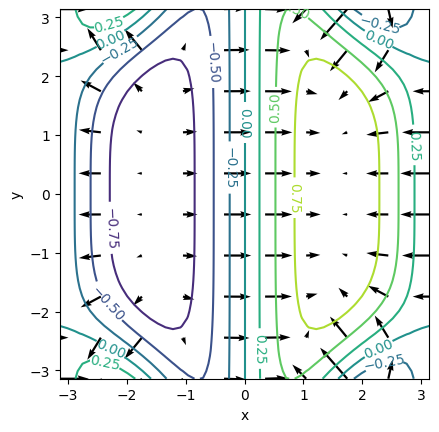

In [22]:
import sympy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

x, y = sp.symbols('x y', real=True) # define las variables simbólicas x, y

F = sp.Matrix([ sp.sin(x)*sp.cos(x*y**2/10) ])
F_lamb = sp.lambdify((x,y),F[0,0], "numpy")
# display(F_lamb)

grad_F = F.jacobian([x,y]).transpose()
grad_F_lamb = sp.lambdify((x,y), [grad_F[0,0],grad_F[1,0]], "numpy") 
# Creamos una función lambdify del gradiente para poder evaluarlo en cualquier punto

N = 50  # 50 puntos en cada dirección de los ejes cartesianos para las curvas de nivel
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)
X, Y = np.meshgrid(x, y)
Values = F_lamb(X,Y)

Ng = 10  # 10 puntos en cada dirección de los ejes cartesianos para los vectores gradientes
xg = np.linspace(-np.pi, np.pi, Ng)
yg = np.linspace(-np.pi, np.pi, Ng)
Xg, Yg = np.meshgrid(xg, yg)
Values_Grad=grad_F_lamb(Xg,Yg)

p = plt.contour(X, Y, Values) # Representación gráfica de las curvas de nivel
plt.clabel(p) # Se añade el valor numérico a cada curva de nivel
plt.quiver(Xg, Yg, Values_Grad[0], Values_Grad[1]) # Representación gráfica del campo de vectores gradiente
# plt.quiver(Xg, Yg, Values_Grad) # Representación gráfica del campo de vectores gradiente
# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()